In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

import seaborn as sns
import torch 
from torch import nn

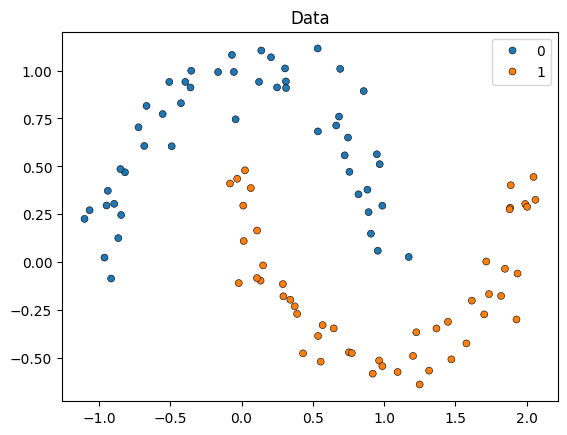

Epoch 0: loss=0.690819501876831
Epoch 1: loss=0.6840589046478271
Epoch 2: loss=0.6709258556365967
Epoch 3: loss=0.6522402167320251
Epoch 4: loss=0.6287118792533875
Epoch 5: loss=0.6026423573493958
Epoch 6: loss=0.574413537979126
Epoch 7: loss=0.5448537468910217
Epoch 8: loss=0.5155235528945923
Epoch 9: loss=0.4921485185623169
Epoch 10: loss=0.4784175753593445
Epoch 11: loss=0.47251269221305847
Epoch 12: loss=0.46716052293777466
Epoch 13: loss=0.46252936124801636
Epoch 14: loss=0.45836248993873596
Epoch 15: loss=0.4546920657157898
Epoch 16: loss=0.45158204436302185
Epoch 17: loss=0.44831013679504395
Epoch 18: loss=0.44471675157546997
Epoch 19: loss=0.44088613986968994
Epoch 20: loss=0.43671131134033203
Epoch 21: loss=0.43224868178367615
Epoch 22: loss=0.4274581968784332
Epoch 23: loss=0.4223659634590149
Epoch 24: loss=0.4169759452342987
Epoch 25: loss=0.4113948345184326
Epoch 26: loss=0.4056858420372009
Epoch 27: loss=0.40001529455184937
Epoch 28: loss=0.39442139863967896
Epoch 29: loss

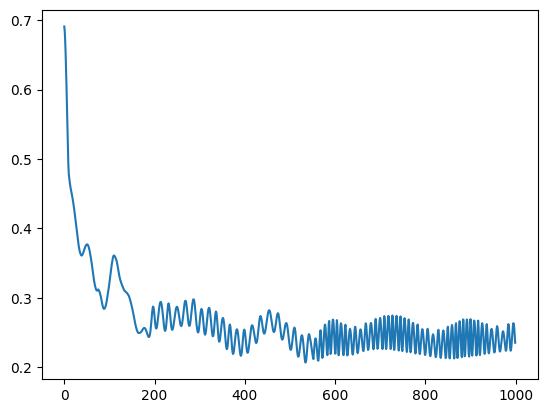

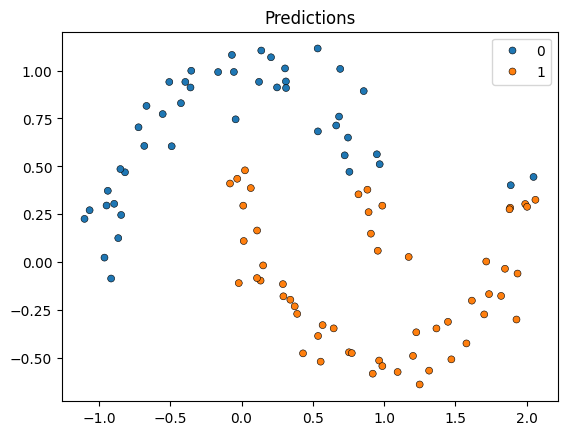

In [2]:
points, labels = make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=0)

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=labels, marker="o", s=25, edgecolor="k", legend=True
).set_title("Data")
plt.show()

learning_rate = 0.01
n_epochs = 1000

X = torch.from_numpy(points).to(dtype=torch.float32)
y = torch.from_numpy(labels).to(dtype=torch.float32)

W1 = torch.randn((3, X.shape[1]))
b1 = torch.zeros((3, 1))

W2 = torch.randn((5, W1.shape[0]))
b2 = torch.zeros((5, 1))

W3 = torch.randn((1, W2.shape[0]))
b3 = torch.zeros((1, 1))

parameters = [W1, b1, W2, b2, W3, b3]

for p in parameters:
    p.requires_grad = True

loss = []

for i in range(n_epochs):
    a1 = (W1 @ X.T + b1).relu()
    a2 = (W2 @ a1 + b2).relu()
    a3 = (W3 @ a2 + b3).sigmoid()
    
    Y = a3.squeeze(0)

    L = torch.nn.functional.binary_cross_entropy(Y, y)
    loss.append(L.item())
    print(f'Epoch {i}: loss={L.item()}')
    L.backward()

    for p in parameters:
        p.data -= learning_rate * p.grad

plt.plot(loss)
plt.show()

predictions = Y.detach().numpy() 
predictions = (predictions > 0.5).astype(int)

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=predictions, marker="o", s=25, edgecolor="k", legend=True
).set_title("Predictions")
plt.show()
